In [1]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Lambda, Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Cropping2D
import glob
import os
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
#read the information from csv file
data = pd.read_csv('merged_sim_data/combined_log.csv')

In [3]:
#Get the values from the column names steering
steering_center = data['steering'].values
#Array declartion to store the corrected values for left and right steering
steering_left_arr = []
steering_right_arr = []

for i in range(len(steering_center)):
    
    # create adjusted steering measurements for the side camera images
    correction = 0.2 # this is a parameter to tune
    
    #Add the correction factor to left and right steering value
    steering_left = steering_center[i] + correction
    steering_right = steering_center[i] - correction
    
    #store the calculated the values of left and right steering in an array
    steering_left_arr.append(steering_left)
    steering_right_arr.append(steering_right)

In [4]:
#Array to hold images
images = []

#Read the set of images present in the path specified
test_images = glob.glob('merged_sim_data/IMG/*.jpg')
for fname in test_images:
    image = mpimg.imread(fname)
    images.append(image)

In [5]:
#set the training data as images and steering values
X_train = np.asarray(images)

#Merge the array of steering values for training the model
Y_left_right = np.asarray(np.append(steering_left_arr, steering_right_arr))

Y_train = np.append(steering_center, Y_left_right)

In [6]:
#Sequentail keras model
model = Sequential()

#Crop the data to the size suggested in the course
model.add(Cropping2D(cropping=((70, 25), (0,0)), input_shape=(160, 320, 3)))

#Normalize the data
model.add(Lambda(lambda x:x/255.0 - 0.5))
          
#1 layer
model.add(Conv2D(24, (5, 5), activation = 'relu', strides=(2, 2)))
#Dropout layer
model.add(Dropout(0.3))
#2 layer
model.add(Conv2D(36, (5, 5), activation = 'relu', strides=(2, 2)))
#Dropout layer
model.add(Dropout(0.3))
# 3 layer
model.add(Conv2D(48, (5, 5), activation = 'relu', strides=(2, 2)))
#Dropout layer
model.add(Dropout(0.3))
#4 layer
model.add(Conv2D(64, (3, 3),  activation = 'relu'))
#Dropout layer
model.add(Dropout(0.3))
#5 layer
model.add(Conv2D(64, (3, 3),  activation = 'relu'))
#Flatten layer
model.add(Flatten())
#Dropout layer
model.add(Dropout(0.3))
model.add(Dense(1162, activation='relu'))#fully connected layer
#Dropout layer
model.add(Dropout(0.3))
model.add(Dense(100, activation='relu'))#fully connected layer
#Dropout layer
model.add(Dropout(0.3))
model.add(Dense(50, activation='relu'))#fully connected layer
#Dropout layer
model.add(Dropout(0.3))
model.add(Dense(10, activation='relu'))#fully connected layer
#Dropout layer
model.add(Dropout(0.3))
model.add(Dense(1))
#Shuffle the tarining data
X_train, Y_train = shuffle(X_train, Y_train)

print('Training Model Starts')

#Adam optimizer and mean squared error is calculated
model.compile(loss='mse',optimizer='adam')
#split the data and train the model
history_object = model.fit(X_train, Y_train, batch_size= 64, epochs= 30, validation_split= 0.2)

model.save('model.h5')
print('Model saved')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Training Model Starts

Train on 13596 samples, validate on 3399 samples
Epoch 1/30
13596/13596 [==============================] - 159s 12ms/step - loss: 0.0663 - val_loss: 0.0558
Epoch 2/30
13596/13596 [==============================] - 152s 11ms/step - loss: 0.0598 - val_loss: 0.0523
Epoch 3/30
13596/13596 [==============================] - 149s 11ms/step - loss: 0.0587 - val_loss: 0.0521
Epoch 4/30
13596/13596 [==============================] - 151s 11ms/step - loss: 0.0569 - val_loss: 0.0517
Epoch 5/30
13596/13596 [==============================] - 150s 11ms/step - loss: 0.0568 - val_loss: 0.0509
Epoch 6/30
13596/13596 [==============================] - 152s 11ms/step - loss: 0.0554 - val_loss: 0.0520
Epoch 7/30
13596/13596 [==============================] - 153s 11ms/step - loss: 0.0558 - val_loss: 0.0516
Epoch 8/30
13596/13596 [==============================] - 152s 11ms/step - loss: 0.0546 - val_loss

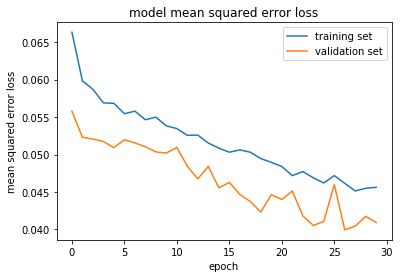

In [7]:
plt.plot(history_object.history['loss'])
plt.plot(history_object.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.savefig('Output_images/Model_loss.jpg')
plt.show()